# Thành viên trong nhóm:
1. Bùi Thị Loan Anh - 52000736
2. Võ Thị Quế Chi - 52000741
3. Vinh Linh - 52000910

# Câu 1: Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh giá vai trò của các đặc trưng đối với mục tiêu bài toán.



- Tiêu đề: Tiếp thị ngân hàng
Nguồn được tạo bởi: Paulo Cortez (Đại học Minho) và Sérgio Moro (ISCTE-IUL) @ 2012

- Cách sử dụng trước đây:
Bộ dữ liệu đầy đủ được mô tả và phân tích trong:

_ S. Moro, R. Laureano và P. Cortez. Sử dụng khai thác dữ liệu để tiếp thị trực tiếp của ngân hàng: Ứng dụng phương pháp CRISP-DM. Ở P. Novais và cộng sự. (Eds.), Kỷ yếu của Hội nghị Mô phỏng và Mô hình hóa Châu Âu - ESM'2011, trang 117-121, Guimarães, Bồ Đào Nha, tháng 10 năm 2011. EUROSIS.

- Thông tin liên quan: Dữ liệu có liên quan đến các chiến dịch tiếp thị trực tiếp của một tổ chức ngân hàng Bồ Đào Nha. Các chiến dịch tiếp thị đều dựa trên các cuộc gọi điện thoại. Thông thường, cần có nhiều hơn một liên hệ với cùng một khách hàng để truy cập xem sản phẩm (tiền gửi có kỳ hạn ngân hàng) có được đăng ký (hoặc không) hay không.

- Bộ dữ liệu: bank-full.csv với tất cả các ví dụ, được sắp xếp theo ngày (từ tháng 5 năm 2008 đến tháng 11 năm 2010).

- Mục tiêu phân loại là dự đoán liệu khách hàng có đăng ký tiền gửi có kỳ hạn hay không (biến y).

- Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

- Number of Attributes: 16 + output attribute.

- Attribute information:
For more information, read [Moro et al., 2011].

- Input variables:

_ Bank client data: 1 - age (numeric) 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) 4 - education (categorical: "unknown","secondary","primary","tertiary") 5 - default: has credit in default? (binary: "yes","no") 6 - balance: average yearly balance, in euros (numeric) 7 - housing: has housing loan? (binary: "yes","no") 8 - loan: has personal loan? (binary: "yes","no")

_ Related with the last contact of the current campaign: 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 10 - day: last contact day of the month (numeric) 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 12 - duration: last contact duration, in seconds (numeric)

_ Other attributes: 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) 15 - previous: number of contacts performed before this campaign and for this client (numeric) 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

- Missing Attribute Values: None

# Mounted Drive

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import các thư viện cần thiết

In [55]:
import os
print(os.listdir("/content/drive/MyDrive/Machine Learning"))

import numpy as np
import pandas as pd
from time import time
import seaborn as sns
%matplotlib inline
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, \
                          precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

['Nhật ký Project Machine Learning.gsheet', 'bank-full.csv', 'Final_MachineLearning.ipynb']


# Đọc dữ liệu

In [56]:
#Importing Dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Tạo cột User và hiển thị các cột dữ liệu



In [57]:
# Tạo cột user
df_user = pd.DataFrame(np.arange(0,len(df)), columns=['user'])
df = pd.concat([df_user, df], axis=1)

# Hiển thị thông tin các cột dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [58]:
df.head(5)

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [59]:
df.tail()

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [60]:
df.columns.values

array(['user', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

# Phân tích dữ liệu

In [61]:
# hiển thị mô tả
df.describe()

,user,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


1. default: Vỡ nợ
2. day-month: ngày tháng liên lạc cuối cùng
3. campaign: số lần liên hệ
4. pdays: số ngày trôi qua từ lần liên lạc cuối
5. previous: số lần liên lạc trước
6. poutcome: kết quả lần trước

In [62]:
df.groupby('y').mean()

<ipython-input-62-e1dafff4daf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('y').mean()


,user,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,21197.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,33228.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Note below how Dataset is unbalanced

In [63]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [64]:
countNo = len(df[df.y == 'no'])
countYes = len(df[df.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(df.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(df.y))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


<Axes: >

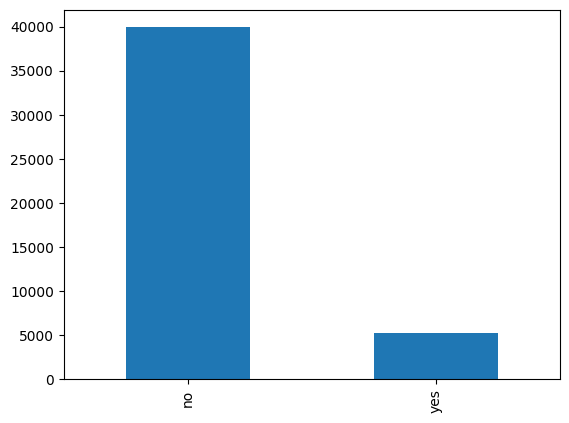

In [65]:
# vẽ biểu đồ để xem phân bố các class có đồng đều không
# => kết quả cho thấy class "no" chiếm tỉ lệ cao hơn rất nhiều so với "yes"
g = df['y'].value_counts()
g.plot.bar()

# Kiểm tra NaN và giá trị trùng lặp

<Axes: >

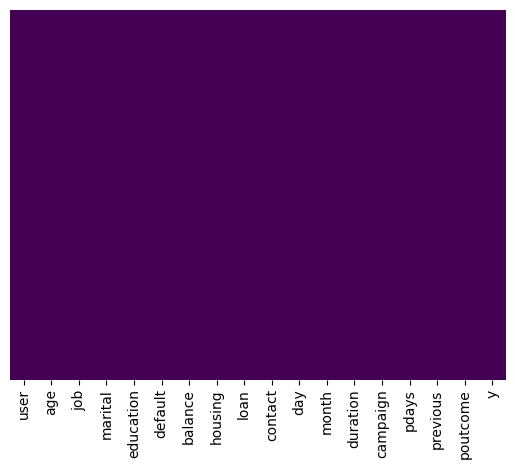

In [66]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [67]:
df.isna().any()

user         False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [68]:
# kiểm tra giá trị bị thiếu NaN
df.isna().sum()

user         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [69]:
# kiểm tra các hàng trùng lập
df.duplicated().sum()

0

# Define X and y

In [70]:
X = df.drop(['y','user','job','marital', 'education', 'contact',
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']

# Chuyển dữ liệu dạng object thành int

In [71]:
columns = X.columns
types = X.dtypes
print(columns)
print(types)

Index(['age', 'default', 'balance', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')
age          int64
default     object
balance      int64
duration     int64
campaign     int64
pdays        int64
previous     int64
dtype: object


In [72]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)
X

,age,balance,duration,campaign,pdays,previous,default_no,default_yes
0,58,2143,261,1,-1,0,1,0
1,44,29,151,1,-1,0,1,0
2,33,2,76,1,-1,0,1,0
3,47,1506,92,1,-1,0,1,0
4,33,1,198,1,-1,0,1,0
...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1,0
45207,71,1729,456,2,-1,0,1,0
45208,72,5715,1127,5,184,3,1,0
45209,57,668,508,4,-1,0,1,0


 Dummy Variable Trap có thể ảnh hưởng tiêu cực đến phân tích của chúng tôi. Variable trap là kịch bản trong đó các biến độc lập có tính đa cộng tuyến - kịch bản trong đó hai hoặc nhiều biến có mối tương quan cao; nói một cách đơn giản, một biến có thể được dự đoán từ những biến khác.

In [73]:
X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})
X

,age,balance,duration,campaign,pdays,previous,default
0,58,2143,261,1,-1,0,0
1,44,29,151,1,-1,0,0
2,33,2,76,1,-1,0,0
3,47,1506,92,1,-1,0,0
4,33,1,198,1,-1,0,0
...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,0
45207,71,1729,456,2,-1,0,0
45208,72,5715,1127,5,184,3,0
45209,57,668,508,4,-1,0,0


# Trực quan hóa dữ liệu

# Age Group

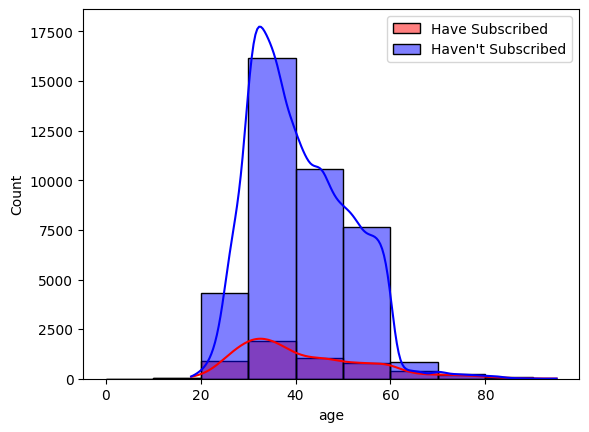

In [74]:
#Age group
bins = range(0, 100, 10)
ax = sns.histplot(df.age[df.y=='yes'],
              color='red', kde=True, bins=bins, label='Have Subscribed')
sns.histplot(df.age[df.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=True, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

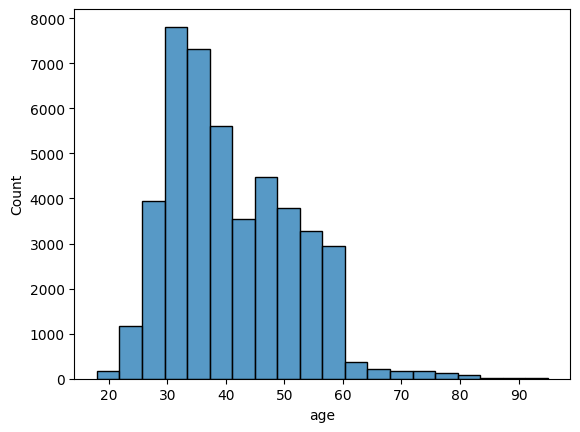

In [75]:
sns.histplot(df.age, bins = 20)

#Age

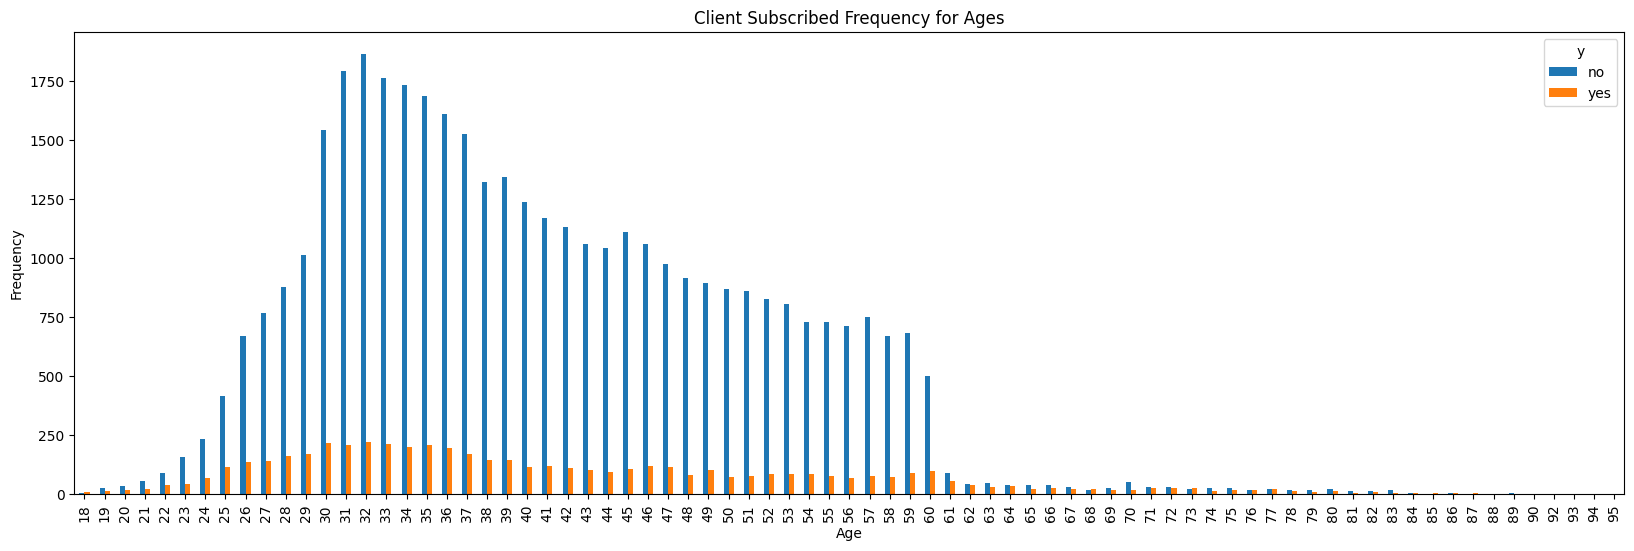

In [76]:
#Age
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Marital

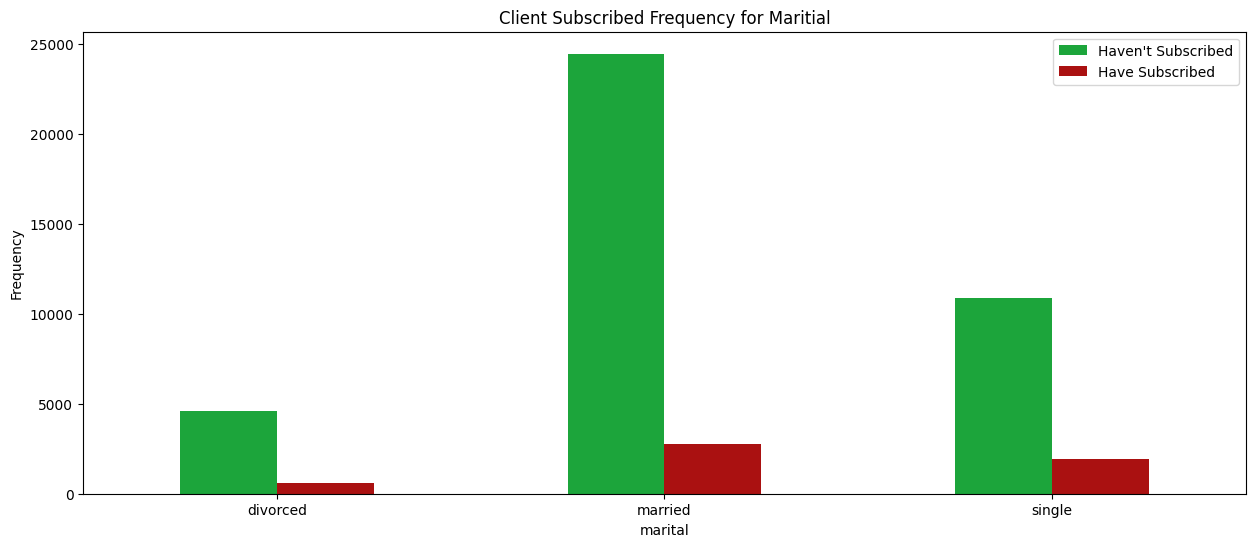

In [77]:
pd.crosstab(df.marital,df.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

# Age - Duration

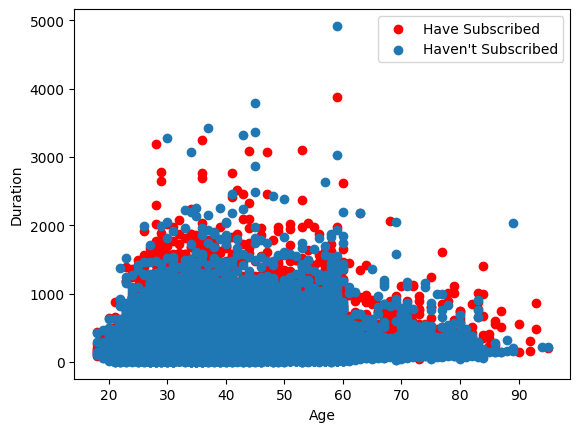

In [78]:
plt.scatter(x=df.age[df.y=='yes'], y=df.duration[(df.y=='yes')], c="red")
plt.scatter(x=df.age[df.y=='no'], y=df.duration[(df.y=='no')])
plt.legend(["Have Subscribed", "Haven't Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

# Age - Duration - Balance

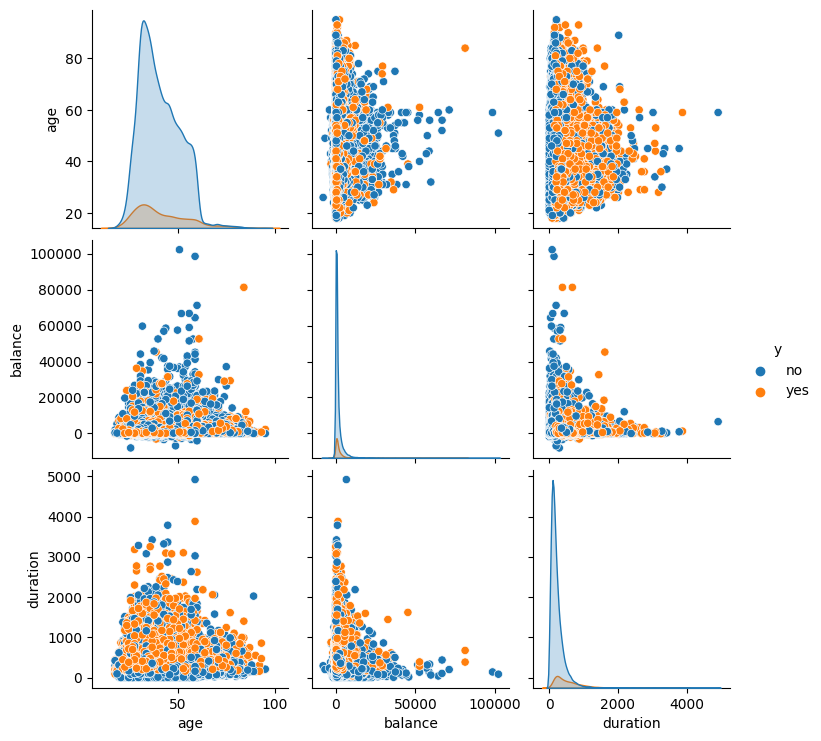

In [79]:
sns.pairplot(data=df, hue='y', vars= ['age', 'balance', 'duration'])

# Count y

<Axes: xlabel='y', ylabel='count'>

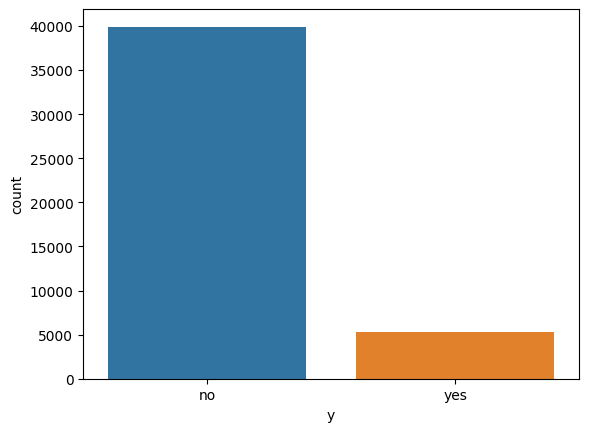

In [80]:
sns.countplot(x='y', data=df, label='Count')

# Age - Balance

<Axes: xlabel='age', ylabel='balance'>

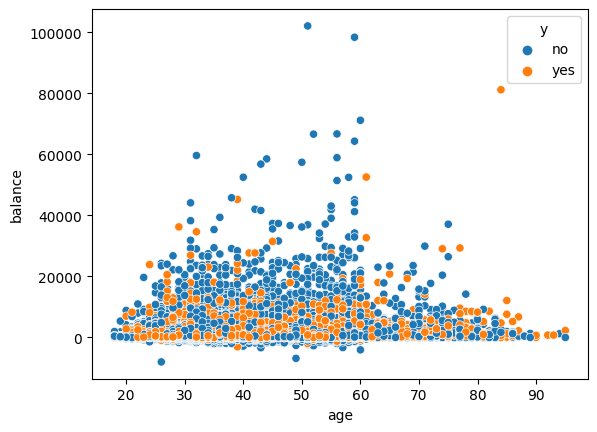

In [81]:
sns.scatterplot(x='age', y='balance',hue='y', data=df)

# Heatmap

<ipython-input-82-36bfa25a706e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap='viridis')


<Axes: >

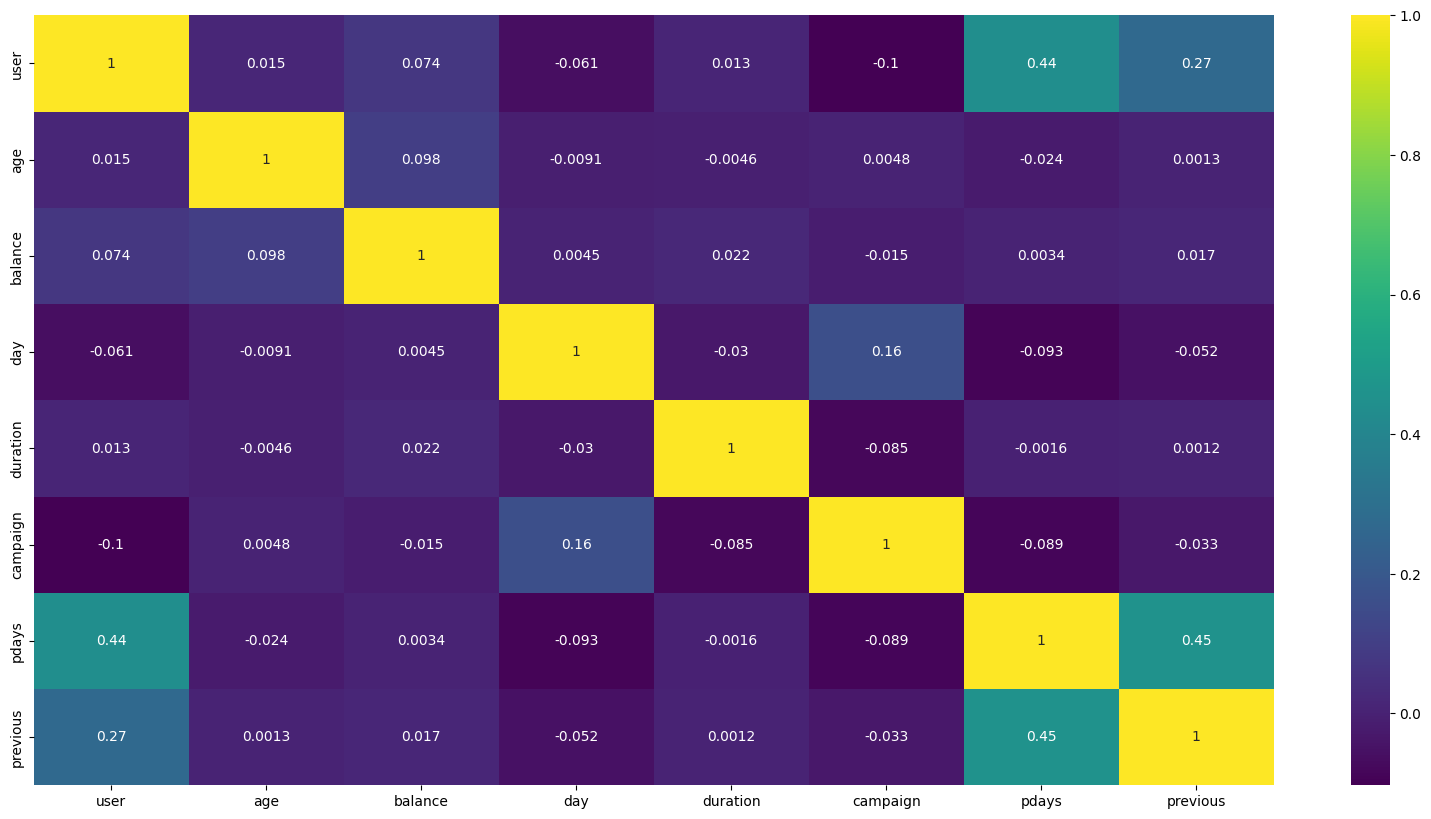

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

# Histograms of Numerical Columns

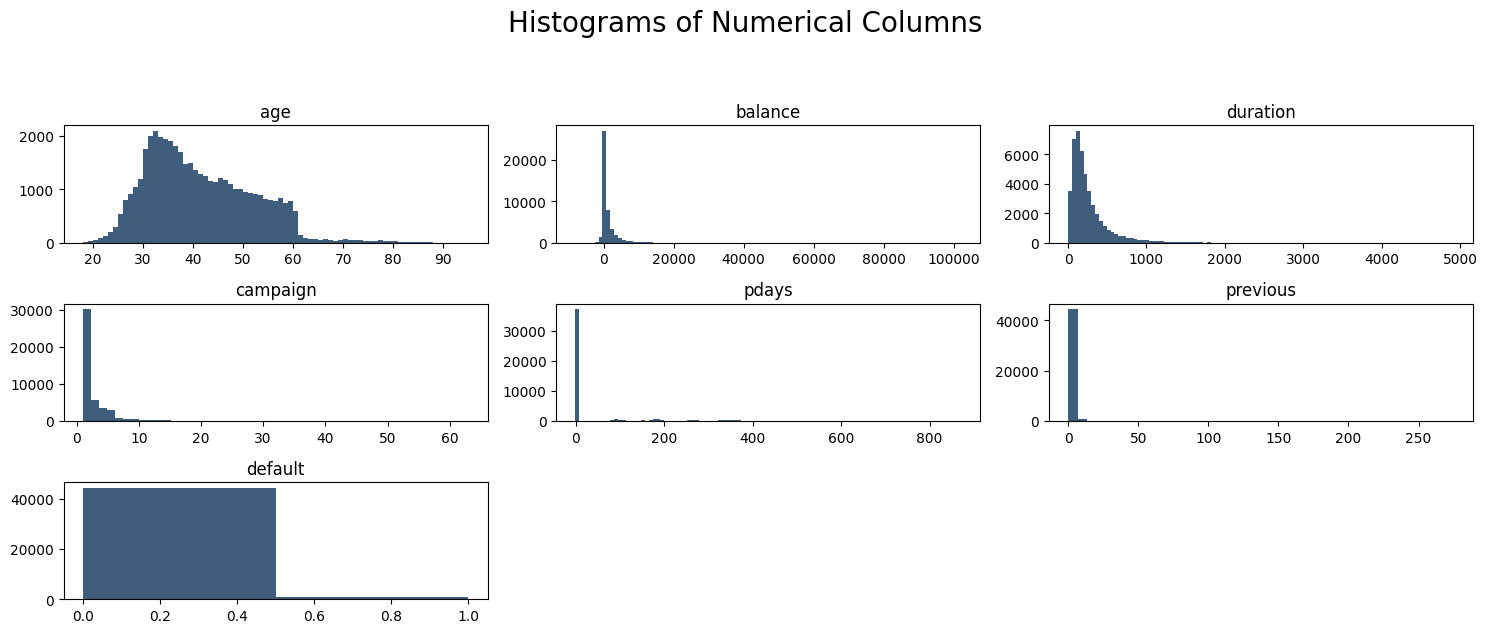

In [83]:
df2 = X
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Pie Plots

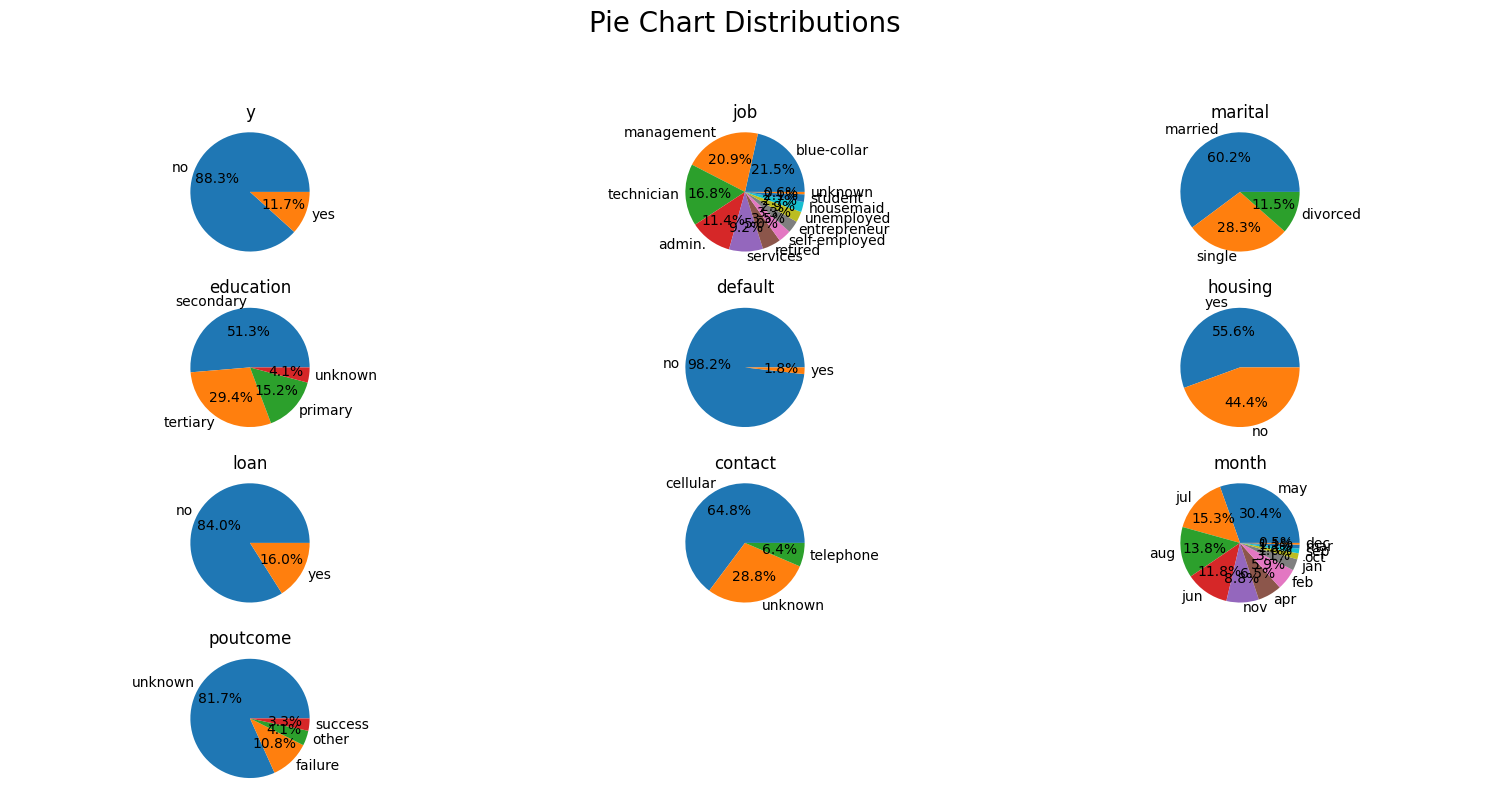

In [84]:
df.columns
df2 = df[['y','job','marital', 'education', 'default', 'housing','loan', 'contact',
             'month', 'poutcome'
                    ]]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])

    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Chia dữ liệu thành tập train và test với tỉ lệ 8:2

In [85]:
# Chia dữ liệu thành 2 bộ train và test với tỷ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (36168, 7) (36168, 1)
Test: (9043, 7) (9043, 1)


# Cân bằng Training set

In [86]:
y_train['y'].value_counts()

1    31937
0     4231
Name: y, dtype: int64

In [87]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [88]:
y_train['y'].value_counts()

0    4231
1    4231
Name: y, dtype: int64

# Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [90]:
print(X_train.shape)
print(X_test.shape)

(8462, 7)
(9043, 7)


In [91]:
print(X_train[:2])
print(X_test[:2])

            age   balance  duration  campaign     pdays  previous  default
44707 -0.676777 -0.271386 -0.366853  0.168489 -0.492115 -0.378465 -0.11943
37095 -0.258597 -0.046970  0.393227 -0.575059 -0.492115 -0.378465 -0.11943
            age   balance  duration  campaign     pdays  previous  default
43782 -0.676777 -0.282822 -0.452576 -0.575059  0.526277  0.528522 -0.11943
4237   0.828670  0.148572 -0.881193 -0.575059 -0.492115 -0.378465 -0.11943


# Câu 2: Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing

# Xây dựng mô hình

In [92]:
y_train = np.ravel(y_train)

def get_metrics1(model):
  # Dự đoán giá trị đầu ra trên tập kiểm tra
  y_pred = model.predict(X_test)

  # Tính các độ đo hiệu suất
  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # In các độ đo hiệu suất
  print(f"Accuracy: {acc:.8f}")
  print(f"f1_score: {f1:.8f}")
  print(f"precision_score: {prec:.8f}")
  print(f"recall_score: {rec:.8f}")

def get_metrics2(model):
  # Dự đoán giá trị đầu ra trên tập kiểm tra
  y_pred = model.predict(X_test)

  # Tính các độ đo hiệu suất
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  # In các độ đo hiệu suất
  print(f"Mean Absolute Error (MAE): {mae:.8f}")
  print(f"Mean Squared Error (MSE): {mse:.8f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.8f}")
  print(f"R-squared: {mae:.8f}")

1. Mô hình cơ bản

1.1 Mô hình Linear Regression

In [93]:
linear = LinearRegression()
linear.fit(X_train, y_train)
get_metrics2(linear)


Mean Absolute Error (MAE): 0.37867392
Mean Squared Error (MSE): 0.17401091
Root Mean Squared Error (RMSE): 0.41714615
R-squared: 0.37867392


1.2 Mô hình Logistic Regression

In [94]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
get_metrics1(lr)

Accuracy: 0.79442663
f1_score: 0.87390626
precision_score: 0.95324060
recall_score: 0.80676268


1.3 Mô hình Decision Tree

In [95]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
get_metrics1(dtc)

Accuracy: 0.71348004
f1_score: 0.81422528
precision_score: 0.95236498
recall_score: 0.71108328


1.4 Mô hình Suppport Vector Machine (SVM)

In [96]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
get_metrics1(svm)

Accuracy: 0.78491651
f1_score: 0.86544448
precision_score: 0.96676971
recall_score: 0.78334377


1.5 Mô hình K-Nearest Neighbors (KNN)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
get_metrics1(knn)

Accuracy: 0.75815548
f1_score: 0.84664470
precision_score: 0.96191842
recall_score: 0.75604258


2. Mô hình Ensemble Learning

2.1 Mô hình Random Forest

In [98]:
# Random Forest model
rf = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
rf.fit(X_train,y_train)
get_metrics1(rf)

Accuracy: 0.77352648
f1_score: 0.85684328
precision_score: 0.96962506
recall_score: 0.76756418


2.2 Mô hình Gradient Boosting Machines (GBM)

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100)
gbm.fit(X_train, y_train)
get_metrics1(gbm)

Accuracy: 0.79896052
f1_score: 0.87515451
precision_score: 0.96883077
recall_score: 0.79799624


# Câu 3: Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán

# Mô hình Feed Forward Neural Network

In [100]:
# Build the FFNN model
ffnn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
ffnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
ffnn_model.fit(X_train, y_train, epochs=300, batch_size=32)

# Evaluate the model
test_loss, test_acc = ffnn_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/300
265/265 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.7440
Epoch 2/300
265/265 [==============================] - 1s 2ms/step - loss: 0.4712 - accuracy: 0.7792
Epoch 3/300
265/265 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7863
Epoch 4/300
265/265 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7882
Epoch 5/300
265/265 [==============================] - 1s 2ms/step - loss: 0.4550 - accuracy: 0.7867
Epoch 6/300
265/265 [==============================] - 1s 2ms/step - loss: 0.4525 - accuracy: 0.7898
Epoch 7/300
265/265 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7913
Epoch 8/300
265/265 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.7938
Epoch 9/300
265/265 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7889
Epoch 10/300
265/265 [==============================] - 1s 2ms/step - loss: 0.4466 - accura

In [101]:
ffnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2625 (10.25 KB)
Trainable params: 2625 (10.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Mô hình Reccurent Neural Network

In [102]:
# # Convert DataFrames to NumPy arrays before reshaping
# X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# # Build the RNN model
# rnn_model = tf.keras.Sequential([
#     tf.keras.layers.SimpleRNN(64, input_shape=(1, X_train.shape[2])),  # Adjust input shape accordingly
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
# ])

# # Compile the model
# rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# rnn_model.fit(X_train_rnn, y_train, epochs=300, batch_size=32)

# # Evaluate the model
# test_loss, test_acc = rnn_model.evaluate(X_test_rnn, y_test)
# print('Test accuracy:', test_acc)

In [103]:
# rnn_model.summary()

# Câu 4: Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán

# Câu 5: Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không.